# TASK 1: UNDERSTAND THE PROBLEM & KEY LEARNING OBJECTIVES

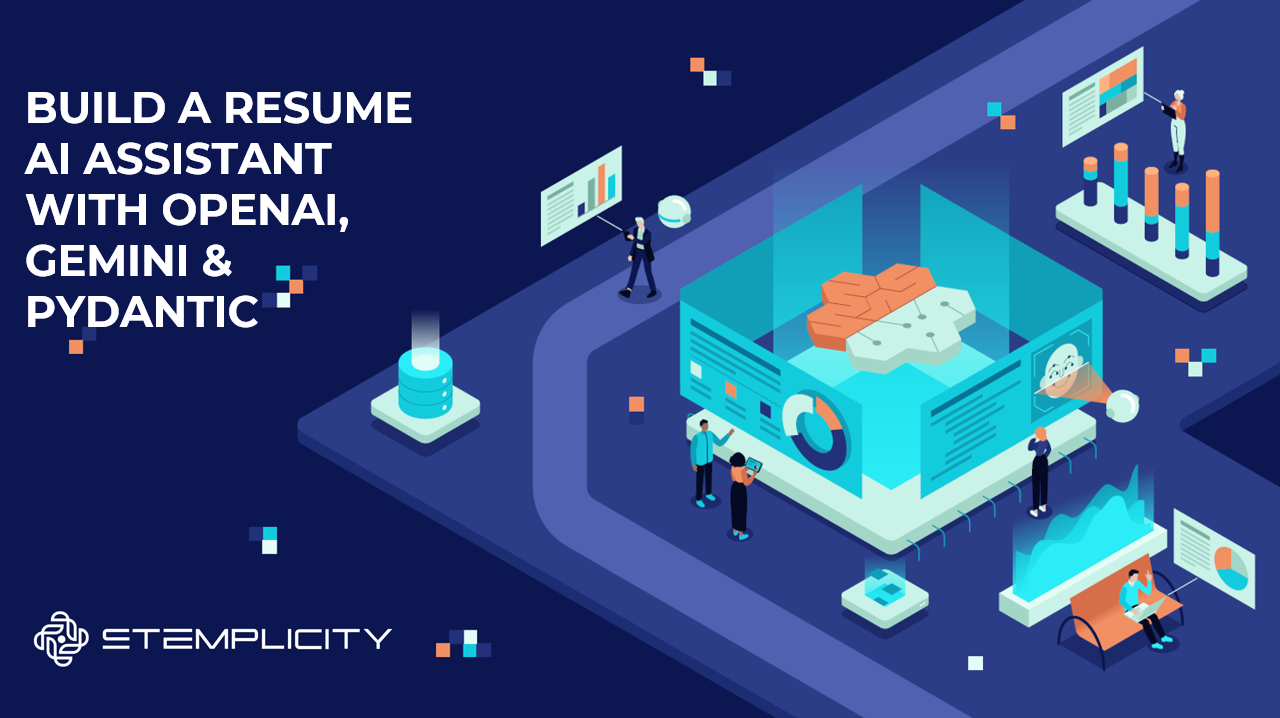

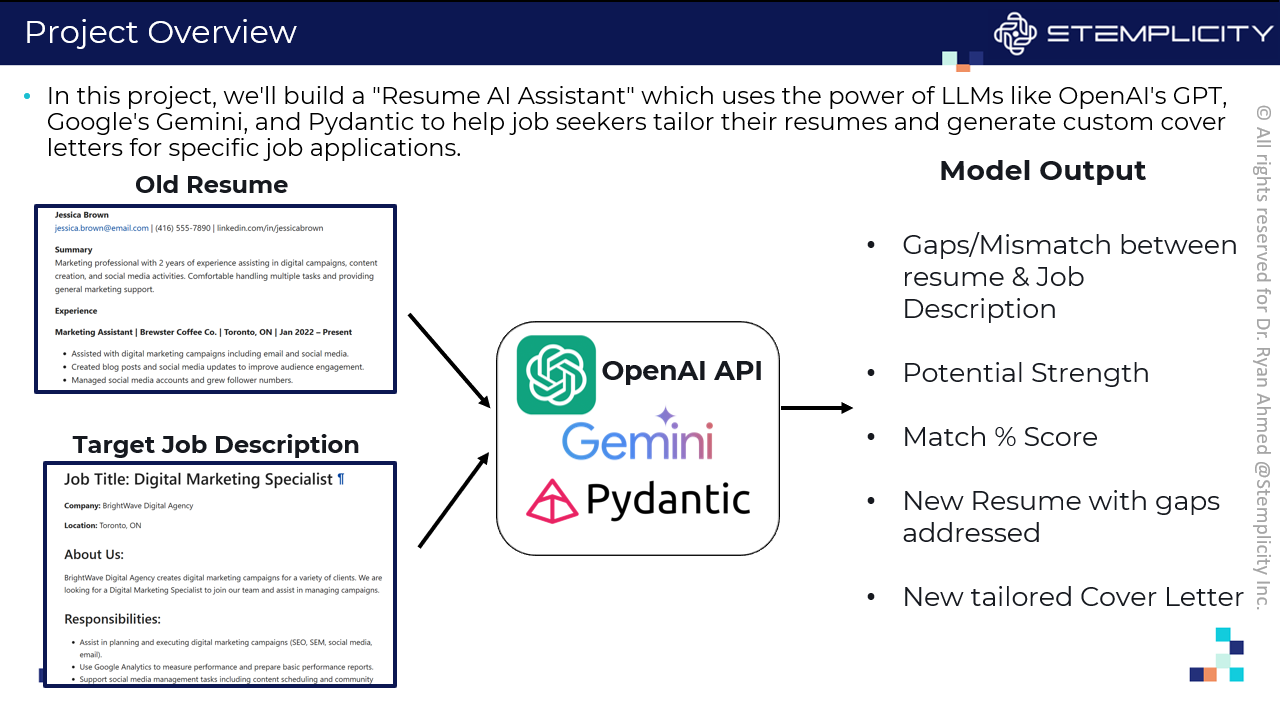

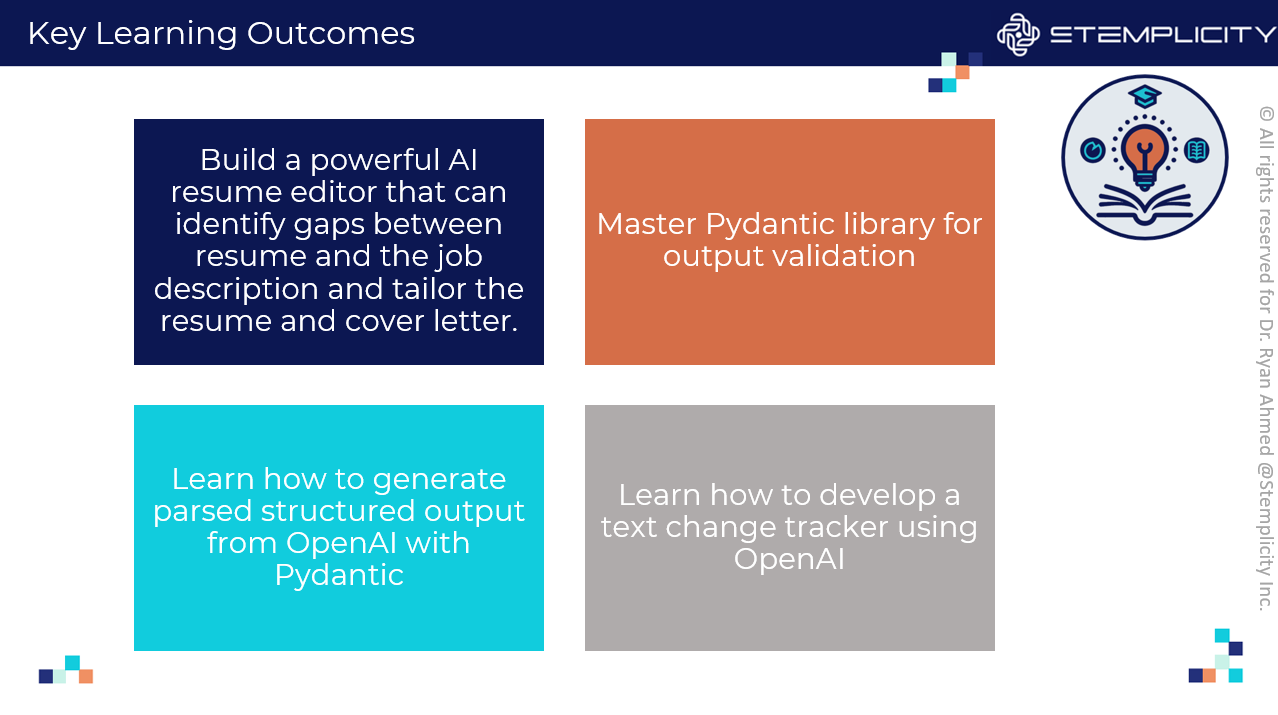

# TASK 2: UNDESTAND THE USE CASE FOR PYDANTIC LIBRARY

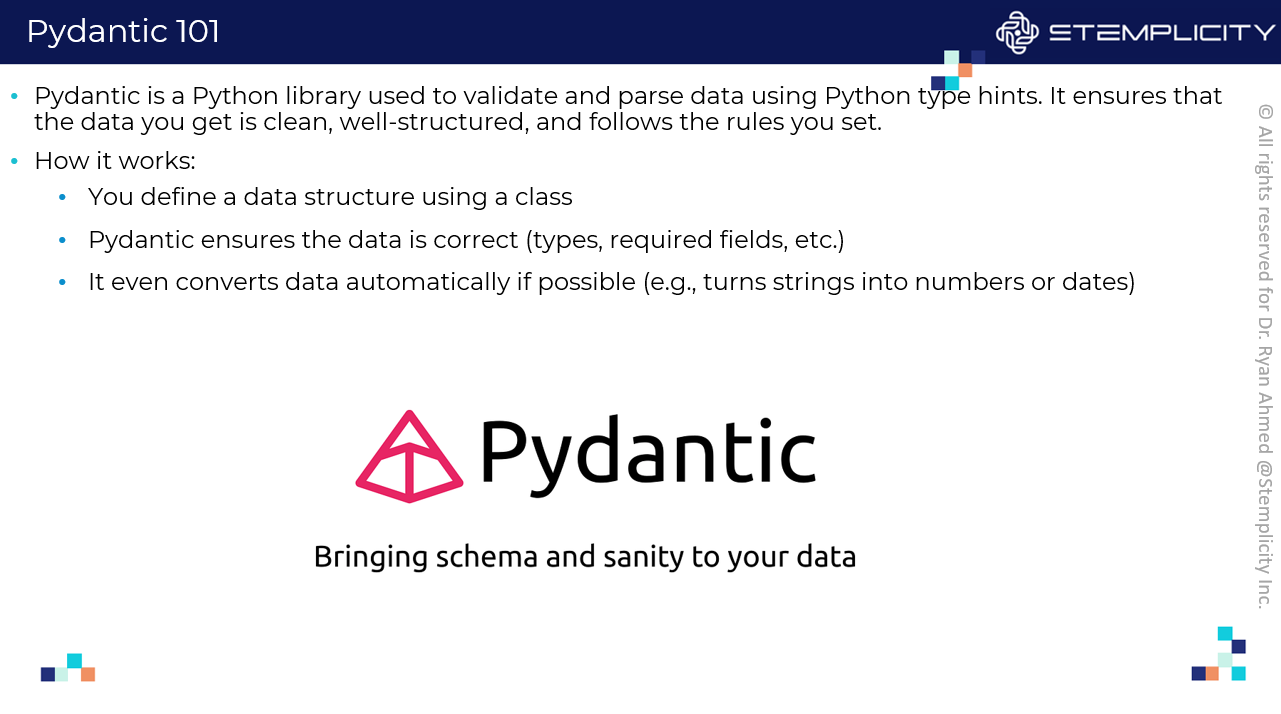

In [ ]:
# Let's install and import Pydantic
# In Pydantic, BaseModel is the core class that you use to create data models.
# BaseModel is like a blueprint for structured data. It defines the fields, their types, and automatically gives you data validation and type conversion capabilities
!pip install pydantic
from pydantic import BaseModel

In [ ]:
# Let's create a new class named "User"
# BaseModel is a special class from Pydantic that performs validation and parsing
# Inside the class, we will declare name, age, and email along with their expected data types using Python type hints
# Pydantic's role is to validate that name is a str, age is an int, and so on.
# If you pass something wrong (like a string instead of a number), Pydantic raises an error.

class User(BaseModel):
    name: str
    age: int
    email: str

In [ ]:
# Let's test it out with a valid (correct) input 
user = User(name = "Mira", age = 30, email = "mira@gmail.com")
print(user.json())

In [ ]:
# Let's test it out with an invalid input 
user = User(name = "Mira", age = "not-a-number", email = "mira@gmail.com")
print(user.json())

**PRACTICE OPPORTUNITY:**
- **Use Pydantic to define and test a simple `Product` model. Perform the following tasks:**
    - **Define a `Product` model with the following fields:**
        - `name` *(str)* — the product's name  
        - `price` *(float)* — the product’s price  
        - `in_stock` *(bool)* — is it currently available?  
    - **Create a valid `Product` instance with realistic values. Example: Product(name="Wireless Mouse", price=29.99, in_stock=True)**
    - **Create an invalid instance by setting price = "ten dollars" instead of a number and observe the error.**

# TASK 3: GENERATE PARSED STRUCTURED OUTPUT FROM OPENAI WITH PYDANTIC

In [ ]:
# Install necessary libraries if running for the first time
!pip install openai google-generativeai python-dotenv ipython

# Import necessary libraries
import os
import google.generativeai as genai
from openai import OpenAI  # Make sure you have the latest openai package (pip install --upgrade openai)
from dotenv import load_dotenv
import json

#  Importing type hints that help describe what kind of data your Python functions or classes expect or return.
# List: A list of elements, all usually of the same type.
# Example: List[int] means a list of integers like [1, 2, 3].

# Dict: A dictionary (key-value pairs).
# Example: Dict[str, int] means keys are strings and values are integers like {'a': 1, 'b': 2}.

# Union: Either one type or another.
# Example: Union[int, str] means the value can be an int or a str.

# Optional: Means a value can be the type you expect or None.
# Example: Optional[int] is the same as Union[int, None].

# Any: Anything at all — no restriction on type.
# You can pass an int, string, list, object, etc.
from typing import List, Dict, Union, Optional, Any
from IPython.display import display, Markdown

print("Libraries imported successfully!")

# Load environment variables from the .env file
load_dotenv()

# Fetch API keys from environment variables
openai_api_key = os.getenv("OPENAI_API_KEY")
google_api_key = os.getenv("GOOGLE_API_KEY")


# Configure the APIs
openai_client = OpenAI(api_key = openai_api_key)
genai.configure(api_key = google_api_key)

# Initialize the Gemini model, choose a suitable model like "gemini-2.0-flash"
gemini_model = genai.GenerativeModel("gemini-2.0-flash")


In [ ]:
# Let's define a Pydantic model called scientist that describes what a valid response should look like
class scientist(BaseModel):
  name: str
  field: str
  known_for: list[str]
  birth_year: int

In [ ]:
# Let's define a prompt
prompt = """
Give me a JSON object with details about a famous scientist.
Include the following fields: name, field, known_for, and birth_year.
"""

# Let's make the API call to OpenAI
# Note that we used "openai_client.beta.chat.completions.parse( )" since we want to parse it into a structured output instead of just plain text 

response = openai_client.beta.chat.completions.parse(model = "gpt-4o",
                                                 messages = [{"role": "user", 
                                                 "content": prompt}],
    temperature = 0,
    response_format = scientist,  # This tells OpenAI to return a parsed `scientist` object that's defined by Pydantic
    max_tokens = 300)

In [ ]:
# Print the parsed response
response.choices[0].message.content

In [ ]:
# Use json.loads() to turn the Json into a Python dictionary
json.loads(response.choices[0].message.content)

**PRACTICE OPPORTUNITY:**
- **You're now familiar with defining a Pydantic model and using OpenAI's response_format feature to get structured JSON output. Now, let's put these skills into practice! Perform the following tasks:**
    - **Create a Pydantic model called `Destination` with the following fields: city, country, and top_attractions**
    - **Define a prompt to ask OpenAI to return a JSON object describing a popular travel destination**
    - **Using `openai_client.beta.chat.completions.parse` with the desitation model as your `response_format`**

# TASK 4: DEFINE THE LLM INPUTS INCLUDING RESUME AND TARGET JOB DESCRIPTION

- Now that we covered the basics of Pydantic, let's start with our project! 
- We need to get the user's resume and the target job description.
- For this notebook, we'll start by defining these as multi-line strings in Python. Later in the course, we will adapt this to take user input or read from files.

In [ ]:
# Helper function to display markdown nicely 
def print_markdown(text):
    """Displays text as Markdown."""
    display(Markdown(text))

In [ ]:
# Let's define a sample resume text
resume_text = """
**Jessica Brown**  
jessica.brown@email.com | (416) 555-7890 | linkedin.com/in/jessicabrown

**Summary**  
Marketing professsional with 2 years of experience assisting in digital campaigns, content creation, and social media activities. Comfortable handling multiple tasks and providing general marketing support.

**Experience**

**Marketing Asssistant | Brewster Coffee Co. | Toronto, ON | Jan 2022 – Present**
- Assisted with digital marketing campaigns including email and social media.
- Created blog posts and social media updates to improve audience engagement.
- Managed social media accounts and grew follower numbers.
- Supported coordination of marketing events.
- Conducted market research and competitor analysis.

**Skils**
- Digital Marketing (SEO basics, Email Marketing)
- Social Media Tools (Hootsuite, Buffer)
- Microsoft Office Suite, Google Workspace
- Basic knowledge of Adobe Photoshop

**Education**  
**Bachelor of Commerce, Marketing** | Ryerson University (now Toronto Metropolitan University), Toronto, ON | May 2021
"""


In [ ]:
# Let's define a sample job description text
job_description_text = """
# Job Title: Digital Marketing Specialist

**Company:** BrightWave Digital Agency

**Location:** Toronto, ON

## About Us:
BrightWave Digital Agency creates digital marketing campaigns for a variety of clients. We are looking for a Digital Marketing Specialist to join our team and assist in managing campaigns.

## Responsibilities:
- Assist in planning and executing digital marketing campaigns (SEO, SEM, social media, email).
- Use Google Analytics to measure performance and prepare basic performance reports.
- Support social media management tasks including content scheduling and community engagement.
- Perform keyword research and assist in optimizing content for SEO.
- Work with designers to help coordinate campaign materials.
- Keep informed about current digital marketing trends.

## Qualifications:
- Bachelor's degree in Marketing, Communications, or similar.
- 2+ years of digital marketing experience.
- Familiarity with SEO, SEM, Google Analytics, and social media.
- Ability to interpret basic marketing data.
- Good communication and writing skills.
- Knowledge of CRM systems (e.g., HubSpot) helpful.
- Experience with Adobe Creative Suite is beneficial.
"""

In [ ]:
# Let's display the original resume 
print_markdown("**--- Original Resume ---**")
print_markdown(resume_text)

In [ ]:
# Let's display the target job desciption
print_markdown("\n**--- Target Job Description ---**")
print_markdown(job_description_text)

**PRACTICE OPPORTUNITY:**
- **Go to a job searching site (like LinkedIn, Indeed, etc.) and find a job description that interests you.**
- **Copy the text of the real job description and paste it into the `job_description_text` variable in the code cell above, replacing the sample text.**
- **Modify the `resume_text` to use your own resume text.**
- **Execute the code cell again to update the variables with your chosen text. Check the printed output.**
  - *Note: We'll be using this in a project later on, so hang tight! It’s going to be super fun and totally worth it!*

# TASK 5: ENHANCE THE RESUME WITH OPENAI API

Now that we have our resume and job description, let's use the OpenAI API to improve the resume to better match the job requirements. We'll make a call to the text generation API and ask it to enhance our resume.


In [ ]:
def openai_generate(prompt: str,
                    model: str = "gpt-4o",
                    temperature: float = 0.7,
                    max_tokens: int = 1500,
                    response_format: Optional[dict] = None) -> str | dict:
    """
    Generate text using OpenAI API

    This function sends a prompt to OpenAI's API and returns the generated response.
    It supports both standard text generation and structured parsing with response_format.

    Args:
        prompt (str): The prompt to send to the model, i.e.: your instructions for the AI
        model (str): The OpenAI model to use (default: "gpt-4o")
        temperature (float): Controls randomness, where lower values make output more deterministic
        max_tokens (int): Maximum number of tokens to generate, which limits the response length
        response_format (dict): Optional format specification
        In simple terms, response_format is optional. If the user gives me a dictionary, cool! 
        If they don't give me anything, just assume it's None and keep going."

    Returns:
        str or dict: The generated text or parsed structured data, depending on response_format
    """

    
    try:
        # Standard text generation without a specific response format
        if not response_format:
            response = openai_client.chat.completions.create(
                model = model,
                messages = [
                    {"role": "system",
                     "content": "You are a helpful assistant specializing in resume writing and career advice.",
                    },
                    {"role": "user", "content": prompt}],
                temperature = temperature,
                max_tokens = max_tokens)
            
            # Extract just the text content from the response
            return response.choices[0].message.content
        
        # Structured response generation (e.g., JSON format)
        else:
            completion = openai_client.beta.chat.completions.parse(
                model = model,  # Make sure to use a model that supports parse
                messages = [
                    # Same system and user messages as above
                    {
                        "role": "system",
                        "content": "You are a helpful assistant specializing in resume writing and career advice.",
                    },
                    {"role": "user", "content": prompt},
                ],
                temperature = temperature,
                response_format = response_format)

            # Return the parsed structured output
            return completion.choices[0].message.parsed
            
    except Exception as e:
        # Error handling to prevent crashes
        return f"Error generating text: {e}"


In [ ]:
prompt = f"""
Context:
You are a professional resume writer helping a candidate tailor their resume for a specific job opportunity. The resume and job description are provided below.

Instruction:
Enhance the resume to make it more impactful. Focus on:
- Highlighting relevant skills and achievements.
- Using strong action verbs and quantifiable results where possible.
- Rewriting vague or generic bullet points to be specific and results-driven.
- Emphasizing experience and skills most relevant to the job description.
- Reorganizing sections if necessary to better match the job requirements.

Resume:
{resume_text}

Output:
Provide a revised and improved version of the resume that is well-formatted. Only return the updated resume.
"""


In [ ]:
# Get response from OpenAI API
openai_output = openai_generate(prompt, temperature = 0.7)

# Display the results
print_markdown("#### OpenAI Response:")
print_markdown(openai_output)

**PRACTICE OPPORTUNITY:**
- **Define a function named gemini_generate that sends a prompt to Google's Gemini API and returns the generated response. Test the function using the same resume enhancement prompt we just used with OpenAI, but now with the Gemini model.**
- **Adjust the temperature parameter when calling the Gemini model. Remember that temperature controls the level of creativity - higher values (closer to 1.0) produce more creative and varied outputs, while lower values (closer to 0.0) make responses more deterministic and focused.**
- **Try running the prompt with different temperature values (e.g., 0.2, 0.7, 0.9) and observe how the creativity and style of the resume enhancements change.**
- **Which temperature setting produced the most effective resume for this particular job? What differences do you notice between OpenAI and Gemini's approaches to resume enhancement?**

# TASK 6: PERFORM A GAP ANALYSIS BETWEEN RESUME & JOB DESCRIPTION 

Now, let's use an LLM to analyze the resume and job description. We want the AI to identify:
1.  Key skills/requirements mentioned in the Job Description.
2.  Relevant skills/experience present in the Resume.
3.  Crucially, the mismatches or gaps – what the job asks for that the resume doesn't highlight well.

We'll use OpenAI for this analysis step. We need to craft a clear prompt.

In [ ]:
# Prompt to analyze the resume against the job description

def analyze_resume_against_job_description(job_description_text: str, resume_text: str, model: str = "openai") -> str:
    """
    Analyze the resume against the job description and return a structured comparison.

    Args:
        job_description_text (str): The job description text.
        resume_text (str): The candidate's resume text.
        model (str): The model to use for analysis ("openai" or "gemini").

    Returns:
        str: A clear, structured comparison of the resume and job description.
    """
    # This prompt instructs the AI to act as a career advisor and analyze how well the resume matches the job description
    # It asks for a structured analysis with 4 specific sections: requirements, matches, gaps, and strengths
    prompt = f"""
    Context:
    You are a career advisor and resume expert. Your task is to analyze a candidate's resume against a specific job description to assess alignment and identify areas for improvement.

    Instruction:
    Review the provided Job Description and Resume. Identify key skills, experiences, and qualifications in the Job Description and compare them to what's present in the Resume. Provide a structured analysis with the following sections:
    1. **Key Requirements from Job Description:** List the main skills, experiences, and qualifications sought by the employer.
    2. **Relevant Experience in Resume:** List the skills and experiences from the resume that match or align closely with the job requirements.
    3. **Gaps/Mismatches:** Identify important skills or qualifications from the Job Description that are missing, unclear, or underrepresented in the Resume.
    4. **Potential Strengths:** Highlight any valuable skills, experiences, or accomplishments in the resume that are not explicitly requested in the job description but could strengthen the application.

    Job Description:

    {job_description_text}

    Resume:

    {resume_text}

    Output:
    Return a clear, structured comparison with the four sections outlined above.
    """

    # This conditional block selects which AI model to use based on the 'model' parameter
    if model == "openai":
        # Uses OpenAI's model to generate the gap analysis with moderate creativity (temperature=0.7)
        gap_analysis = openai_generate(prompt, temperature=0.7)
    elif model == "gemini":
        # Uses Google's Gemini model with less creativity (temperature=0.5) for more focused results
        gap_analysis = gemini_generate(prompt, temperature=0.5)
    else:
        # Raises an error if an invalid model name is provided
        raise ValueError(f"Invalid model: {model}")

    # Returns the generated gap analysis text
    return gap_analysis



In [ ]:
# Call the function to analyze the resume against the job description using OpenAI
gap_analysis_openai = analyze_resume_against_job_description(job_description_text, 
                                                             resume_text, 
                                                             model = "openai")

# Displays the analysis results in Markdown format
print_markdown("#### OpenAI Response:")
print_markdown(gap_analysis_openai)

**PRACTICE OPPORTUNITY:**
- **Companies nowadays consider the knowledge of AI a critical skill for candidates. Update the prompt to highlight the need for AI skills such as prompt engineering and ChatGPT knowledge in the `potential strength` section**
- **Execute the function definition cell again, and then the cell that calls `analyze_resume_against_job_description`. Did the change in the prompt lead to a more useful analysis output? Try Gemini as well**

# TASK 7: DRAFT A NEW TAILORED RESUME BY AI WITH CHANGE TRACKING (WITH PYDANTIC)

Now, we'll use the insights gained (analysis and suggestions) to generate a completely rewritten, tailored resume using OpenAI. A key enhancement here is to ask the AI not just to list the changes, but to try and identify which sections or areas of the resume were modified. This helps the user quickly see the impact of the tailoring.

We'll ask the AI for two outputs:
1.  The full text of the tailored resume.
2.  A structured list (using Markdown) describing the key changes and where they were made (e.g., Summary, Experience section, Skills).

In [ ]:
# Define Pydantic models for structured output
# The ResumeOutput class is a Pydantic model that defines the structure of the output
# for the resume generation function. It includes two fields:
# (1) updated_resume: A string that contains the final rewritten resume.
# (2) diff_markdown: A string containing the resume's HTML-coloured version highlighting additions and deletions.

class ResumeOutput(BaseModel):
    updated_resume: str
    diff_markdown: str


def generate_resume(
    job_description_text: str, resume_text: str, gap_analysis_openai: str, model: str = "openai") -> dict:
    """
    Generate a tailored resume using OpenAI or Gemini.

    Args:
        job_description_text (str): The job description text.
        resume_text (str): The candidate's resume text.
        gap_analysis_openai (str): The gap analysis result from OpenAI.
        model (str): The model to use for resume generation.

    Returns:
        dict: A dictionary containing the updated resume and diff markdown.
    """
    # Construct the prompt for the AI model to generate the tailored resume.
    # The prompt includes context, instructions, and input data (original resume,
    # target job description, and gap analysis).
    prompt = (
        """
    ### Context:
    You are an expert resume writer and editor. Your goal is to rewrite the original resume to match the target job description, using the provided tailoring suggestions and analysis.

    ---

    ### Instruction:
    1. Rewrite the entire resume to best match the **Target Job Description** and **Gap Analysis to the Job Description**.
    2. Improve clarity, add job-relevant keywords, and quantify achievements.
    3. Specifically address the gaps identified in the analysis by:
       - Adding missing skills and technologies mentioned in the job description
       - Reframing experience to highlight relevant accomplishments
       - Strengthening sections that were identified as weak in the analysis
    4. Prioritize addressing the most critical gaps first
    5. Incorporate industry-specific terminology from the job description
    6. Ensure all quantifiable achievements are properly highlighted with metrics
    7. Return two versions of the resume:
        - `updated_resume`: The final rewritten resume (as plain text)
        - `diff_html`: A version of the resume with inline highlights using color:
            - Additions or rewritten content should be **green**:  
            `<span style="color:green">your added or changed text</span>`
            - Removed content should be **red and struck through**:  
            `<span style="color:red;text-decoration:line-through">removed text</span>`
            - Leave unchanged lines unmarked.
        - Keep all section headers and formatting consistent with the original resume.

    ---

    ### Output Format:

    ```json
    {
    "updated_resume": "<full rewritten resume as plain text>",
    "diff_markdown": "<HTML-colored version of the resume highlighting additions and deletions>"
    }
    ```
    ---
    ### Input:

    **Original Resume:**

    """
        + resume_text
        + """


    **Target Job Description:**

    """
        + job_description_text
        + """


    **Analysis of Resume vs. Job Description:**

    """
        + gap_analysis_openai
    )

    # Depending on the selected model, call the appropriate function to generate the resume.
    # If the OpenAI model is selected, it uses a temperature of 0.7 for creativity.
    if model == "openai":
        updated_resume_json = openai_generate(prompt, temperature = 0.7, response_format = ResumeOutput)
    # If the Gemini model is selected, it uses a lower temperature of 0.5 for more focused results.
    elif model == "gemini":
        updated_resume_json = gemini_generate(prompt, temperature = 0.5)
    else:
        # Raise an error if an invalid model name is provided.
        raise ValueError(f"Invalid model: {model}")

    # Return the generated resume output as a dictionary.
    return updated_resume_json


In [ ]:
# Call the generate_resume function with the provided job description, resume text, and gap analysis.
updated_resume_json = generate_resume(job_description_text, resume_text, gap_analysis_openai, model="openai")
# Display the updated resume in Markdown format.
print_markdown(updated_resume_json.updated_resume)

In [ ]:
print_markdown(updated_resume_json.diff_markdown)

**PRACTICE OPPORTUNITY:**
- **Test OpenAI API using a different job description and resume. You can use the same data from the previous practice opportunities.**
- **Execute the function definition cell and the generation cell again. Perform a sanity check.**

# TASK 8: GENERATE A CUSTOM COVER LETTER

With the newly tailored resume, let's generate a corresponding cover letter. 
We'll use OpenAI, feeding it the tailored resume (from the previous task) and the original job description. This ensures the cover letter highlights the most relevant points from the improved resume.

In [ ]:
# Define Pydantic models for structured output
# The CoverLetterOutput class is a Pydantic model that defines the structure of the output for the cover letter generation.
# It ensures that the output will contain a single field, 'cover_letter', which is a string.

class CoverLetterOutput(BaseModel):
    cover_letter: str

# The generate_cover_letter function creates a cover letter based on the provided job description and updated resume.
# It takes three parameters:
# (1) job_description_text: A string containing the job description for the position.
# (2) updated_resume: A string containing the candidate's updated resume.
# (3) model: A string indicating which model to use for generating the cover letter (default is "openai").
# The function returns a dictionary containing the generated cover letter.

def generate_cover_letter(job_description_text: str, updated_resume: str, model: str = "openai") -> dict:
    """
    Generate a cover letter using OpenAI or Gemini.

    Args:
        job_description_text (str): The job description text.
        updated_resume (str): The candidate's updated resume text.
        model (str): The model to use for cover letter generation.

    Returns:
        dict: A dictionary containing the cover letter.
    """

    # Construct the prompt for the AI model, including context and instructions for writing the cover letter.
    prompt = (
        """
    ### Context:
    You are a professional career coach and expert cover letter writer.

    ---

    ### Instruction:
    Write a compelling, personalized cover letter based on the **Updated Resume** and the **Target Job Description**. The letter should:
    1. Be addressed generically (e.g., "Dear Hiring Manager")
    2. Be no longer than 4 paragraphs
    3. Highlight key achievements and experiences from the updated resume
    4. Align with the responsibilities and qualifications in the job description
    5. Reflect the applicant's enthusiasm and fit for the role
    6. End with a confident and polite closing statement

    ---

    ### Output Format (JSON):
    ```json
    {
    "cover_letter": "<final cover letter text>"
    }
    ```
    ---

    ### Input:

    **Updated Resume:**

    """
        + updated_resume
        + """
    **Target Job Description:**

    """
        + job_description_text
    )

    # Depending on the selected model, call the appropriate function to generate the cover letter.
    if model == "openai":
        # Get response from OpenAI API
        updated_cover_letter = openai_generate(prompt, temperature=0.7, response_format=CoverLetterOutput)
    elif model == "gemini":
        # Get response from Gemini API
        updated_cover_letter = gemini_generate(prompt, temperature=0.5)
    else:
        # Raise an error if an invalid model name is provided.
        raise ValueError(f"Invalid model: {model}")

    # Return the generated cover letter as a dictionary.
    return updated_cover_letter


In [ ]:
# Call the generate_cover_letter function with the provided job description and updated resume.
updated_cover_letter = generate_cover_letter(job_description_text, updated_resume_json.updated_resume, model="openai")

# Display the generated cover letter in Markdown format.
print_markdown(updated_cover_letter.cover_letter)

**PRACTICE OPPORTUNITY:**
- **Look at the job description again. Does the company sound formal, informal, fast-paced, mission-driven?**
- **Modify the `generate_cover_letter` function's prompt. Add an instruction about the desired tone. Examples: "Write in a slightly informal but enthusiastic tone suitable for a startup environment." or "Adopt a very formal and professional tone for a corporate role."**
- **Execute the function definition and the generation cell using the tailored resume. Does the cover letter's tone better reflect the target company culture?**

# TASK 9: UNIFIED RESUME AND COVER LETTER GENERATION FUNCTION 

Now that we have all the building blocks, let's create a single function, `run_resume_rocket`, that takes the original resume and job description text and performs the entire workflow: gap analysis, resume tailoring with diff tracking, and cover letter generation. This makes the tool much easier to reuse.

In [ ]:
def run_resume_rocket(resume_text: str, job_description_text: str) -> tuple[str, str]:
    """
    Run the resume rocket workflow.

    Args:
        resume_text (str): The candidate's resume text.
        job_description_text (str): The job description text.

    Returns:
        tuple: A tuple containing the updated resume and cover letter.
    """
    # Analyze the candidate's resume against the job description using OpenAI's model.
    # This function will return a structured analysis highlighting gaps and strengths.
    gap_analysis_openai = analyze_resume_against_job_description(job_description_text, 
                                                                 resume_text, 
                                                                 model="openai")

    # Display the gap analysis results in Markdown format for better readability.
    print_markdown(gap_analysis_openai)

    # Print separators for clarity in the output.
    print("\n--------------------------------")
    print("--------------------------------\n")

    # Generate an updated resume based on the job description, original resume, and gap analysis.
    # This function will return a JSON-like object containing the updated resume and a diff markdown.
    updated_resume_json = generate_resume(job_description_text, 
                                          resume_text, 
                                          gap_analysis_openai, 
                                          model = "openai")

    # Display the diff markdown which shows the changes made to the resume.
    print_markdown(updated_resume_json.diff_markdown)

    # Print separators for clarity in the output.
    print("\n--------------------------------")
    print("--------------------------------\n")

    # Display the updated resume in Markdown format.
    print_markdown(updated_resume_json.updated_resume)

    # Print separators for clarity in the output.
    print("\n--------------------------------")
    print("--------------------------------\n")

    # Generate a cover letter based on the job description and the updated resume.
    # This function will return the generated cover letter.
    updated_cover_letter = generate_cover_letter(
        job_description_text, updated_resume_json.updated_resume, model="openai"
    )

    # Display the generated cover letter in Markdown format.
    print_markdown(updated_cover_letter.cover_letter)

    # Print separators for clarity in the output.
    print("\n--------------------------------")
    print("--------------------------------\n")

    # Return the updated resume and the generated cover letter as a tuple.
    return updated_resume_json.updated_resume, updated_cover_letter.cover_letter



In [ ]:
# Call the run_resume_rocket function with the provided resume and job description texts.
resume, cover_letter = run_resume_rocket(resume_text, job_description_text)

**PRACTICE OPPORTUNITY:**
- **Find a different sample resume online and a different job description. Perhaps choose a senior data scientist role with 5 years of experience.**
- **Update the variables (e.g., `new_resume_text`, `new_job_description_text`) by assigning your new data to them.**
- **Call the `run_resume_rocket` function using these new variables and test the robustness of your pipeline.**

# PRACTICE OPPORTUNITIES SOLUTION

**PRACTICE OPPORTUNITY SOLUTION:**
- **Use Pydantic to define and test a simple `Product` model. Perform the following tasks:**
    - **Define a `Product` model with the following fields:**
        - `name` *(str)* — the product's name  
        - `price` *(float)* — the product’s price  
        - `in_stock` *(bool)* — is it currently available?  
    - **Create a valid `Product` instance with realistic values. Example: Product(name="Wireless Mouse", price=29.99, in_stock=True)**
    - **Create an invalid instance by setting price = "ten dollars" instead of a number and observe the error.**

In [ ]:
from pydantic import BaseModel
class Product(BaseModel):
    name: str
    price: float
    in_stock: bool

In [ ]:
# Create a valid product
product = Product(name = "Wireless Mouse",
                  price = 25.99,
                  in_stock = True)
print(product.json())

In [ ]:
# Create an invalid product
product = Product(name = "Wireless Mouse",
                  price = "ten dollars",
                  in_stock = True)
print(product.json())

**PRACTICE OPPORTUNITY SOLUTION:**
- **You're now familiar with defining a Pydantic model and using OpenAI's response_format feature to get structured JSON output. Now, let's put these skills into practice! Perform the following tasks:**
    - **Create a Pydantic model called `Destination` with the following fields: city, country, and top_attractions**
    - **Define a prompt to ask OpenAI to return a JSON object describing a popular travel destination**
    - **Using `openai_client.beta.chat.completions.parse` with the desitation model as your `response_format`**

In [ ]:
class Destination(BaseModel):
    city: str
    country: str
    top_attractions: list[str]


In [ ]:
prompt = """
Give me a JSON object describing a travel destination.
Include the following fields:
- city
- country
- top_attractions (list of strings)
"""

response = openai_client.beta.chat.completions.parse(
    model = "gpt-4o",
    messages = [{"role": "user", "content": prompt}],
    temperature = 0,
    max_tokens = 300,
    response_format = Destination)


In [ ]:
response.choices[0].message.content

In [ ]:
json.loads(response.choices[0].message.content)

**PRACTICE OPPORTUNITY SOLUTION:**
- **Go to a job searching site (like LinkedIn, Indeed, etc.) and find a job description that interests you.**
- **Copy the text of the real job description and paste it into the `job_description_text` variable in the code cell above, replacing the sample text.**
- **Modify the `resume_text` to use your own resume text.**
- **Execute the code cell again to update the variables with your chosen text. Check the printed output.**
  - *Note: We'll be using this in a project later on, so hang tight! It’s going to be super fun and totally worth it!*

In [ ]:
resume_text = """
**Alex Kim**  
alex.kim@email.com | (647) 555-1234 | linkedin.com/in/alexkim  

**Summary**  
Entry-level Data Scientist with 2 years of experience working on machine learning models, data analysis, and Python scripting. Passionate about extracting insights from data and building models to solve real-world problems.

**Experience**

**Junior Data Analyst | Insight Analytics Inc. | Toronto, ON | Jan 2022 – Present**  
- Analyzed large datasets using Python (pandas, NumPy) to support client reports.  
- Built and evaluated simple regression and classification models using scikit-learn.  
- Created data visualizations using Matplotlib and Seaborn.  
- Automated weekly reporting tasks using Python scripts and Google Sheets API.  
- Participated in team brainstorming sessions for model improvement.

**Skills**  
- Programming: Python (pandas, NumPy, scikit-learn), SQL  
- Data Visualization: Matplotlib, Seaborn, Tableau (basic)  
- Machine Learning: Linear Regression, Decision Trees, KNN  
- Tools: Jupyter Notebook, Git, Google Colab  
- Basic knowledge of AWS and Docker

**Education**  
**Bachelor of Science, Computer Science** | University of Toronto, ON | May 2021  
"""

In [ ]:
job_description_text = """
# Job Title: Junior Data Scientist  

**Company:** DataForge Labs  

**Location:** Toronto, ON  

## About Us:  
DataForge Labs is a growing AI consultancy helping clients solve problems with data and machine learning. We are hiring a Junior Data Scientist to join our analytics team.  

## Responsibilities:  
- Assist in cleaning, exploring, and analyzing data to identify trends.  
- Build and validate basic machine learning models (regression, classification).  
- Work with the team to deliver dashboards and visual insights.  
- Communicate results to stakeholders in a clear, simple manner.  
- Learn and grow with support from senior data scientists.  

## Qualifications:  
- Bachelor’s degree in Computer Science, Statistics, or a related field.  
- 1–2 years of experience in a data-related role or relevant projects.  
- Proficiency in Python and libraries like pandas, NumPy, scikit-learn.  
- Basic understanding of machine learning algorithms.  
- Good communication and analytical thinking skills.  
- Experience with SQL and data visualization tools is a plus.  
"""


In [ ]:
# Let's display the original resume 
print_markdown("**--- Original Resume ---**")
print_markdown(resume_text)

In [ ]:
# Let's display the target job desciption
print_markdown("\n**--- Target Job Description ---**")
print_markdown(job_description_text)

**PRACTICE OPPORTUNITY SOLUTION:**
- **Define a function named gemini_generate that sends a prompt to Google's Gemini API and returns the generated response. Test the function using the same resume enhancement prompt we just used with OpenAI, but now with the Gemini model.**
- **Adjust the temperature parameter when calling the Gemini model. Remember that temperature controls the level of creativity - higher values (closer to 1.0) produce more creative and varied outputs, while lower values (closer to 0.0) make responses more deterministic and focused.**
- **Try running the prompt with different temperature values (e.g., 0.2, 0.7, 0.9) and observe how the creativity and style of the resume enhancements change.**
- **Which temperature setting produced the most effective resume for this particular job? What differences do you notice between OpenAI and Gemini's approaches to resume enhancement?**

In [ ]:
def gemini_generate(prompt: str, temperature: float = 0.7, max_output_tokens: int = 1500) -> str:
    """
    Generate text using Google Gemini API

    This function sends a prompt to Google's Gemini API and returns the generated response.
    It provides an alternative AI model option to OpenAI.

    Args:
        prompt (str): The prompt to send to the model - your instructions for the AI
        temperature (float): Controls randomness (0.0-1.0) - lower values make output more deterministic
        max_output_tokens (int): Maximum number of tokens to generate - limits response length

    Returns:
        str: The generated text response from Gemini
    """
    try:
        # Create a generation config to control response parameters
        response = gemini_model.generate_content(
            prompt,
            generation_config = genai.types.GenerationConfig(
                temperature = temperature, max_output_tokens = max_output_tokens
            ),
        )
        # Return just the text content from the response
        return response.text
    except Exception as e:
        # Error handling to prevent crashes
        return f"Error generating text: {e}"

In [ ]:
gemini_output = gemini_generate(prompt, temperature = 0.7)

print_markdown("#### Gemini Response:")
print_markdown(gemini_output)

**PRACTICE OPPORTUNITY SOLUTION:**
- **Companies nowadays consider the knowledge of AI a critical skill for candidates. Update the prompt to highlight the need for AI skills such as prompt engineering and ChatGPT knowledge in the `potential strength` section**
- **Execute the function definition cell again, and then the cell that calls `analyze_resume_against_job_description`. Did the change in the prompt lead to a more useful analysis output? Try Gemini as well**

In [ ]:
# Prompt to analyze the resume against the job description

def analyze_resume_against_job_description(job_description_text: str, resume_text: str, model: str = "openai") -> str:
    """
    Analyze the resume against the job description and return a structured comparison.

    Args:
        job_description_text (str): The job description text.
        resume_text (str): The candidate's resume text.
        model (str): The model to use for analysis ("openai" or "gemini").

    Returns:
        str: A clear, structured comparison of the resume and job description.
    """
    # This prompt instructs the AI to act as a career advisor and analyze how well the resume matches the job description
    # It asks for a structured analysis with 4 specific sections: requirements, matches, gaps, and strengths
    prompt = f"""
    Context:
    You are a career advisor and resume expert. Your task is to analyze a candidate's resume against a specific job description to assess alignment and identify areas for improvement.

    Instruction:
    Review the provided Job Description and Resume. Identify key skills, experiences, and qualifications in the Job Description and compare them to what's present in the Resume. Provide a structured analysis with the following sections:
    1. **Key Requirements from Job Description:** List the main skills, experiences, and qualifications sought by the employer.
    2. **Relevant Experience in Resume:** List the skills and experiences from the resume that match or align closely with the job requirements.
    3. **Gaps/Mismatches:** Identify important skills or qualifications from the Job Description that are missing, unclear, or underrepresented in the Resume.
    4. **Potential Strengths:** Highlight any valuable skills, experiences, or accomplishments in the resume that are not explicitly requested in the job description but could strengthen the application. 
    Focus on AI skills such as Prompt engineering and ChatGPT. Include any AI skills that are relevant to the position (be detailed on this point).

    Job Description:

    {job_description_text}

    Resume:

    {resume_text}

    Output:
    Return a clear, structured comparison with the four sections outlined above.
    """

    # This conditional block selects which AI model to use based on the 'model' parameter
    if model == "openai":
        # Uses OpenAI's model to generate the gap analysis with moderate creativity (temperature=0.7)
        gap_analysis = openai_generate(prompt, temperature=0.9)
    elif model == "gemini":
        # Uses Google's Gemini model with less creativity (temperature=0.5) for more focused results
        gap_analysis = gemini_generate(prompt, temperature=0.5)
    else:
        # Raises an error if an invalid model name is provided
        raise ValueError(f"Invalid model: {model}")

    # Returns the generated gap analysis text
    return gap_analysis


In [ ]:
# Call the function to analyze the resume against the job description using OpenAI
gap_analysis_openai = analyze_resume_against_job_description(job_description_text, 
                                                             resume_text, 
                                                             model = "openai")

# Displays the analysis results in Markdown format
print_markdown("#### OpenAI Response:")
print_markdown(gap_analysis_openai)

**PRACTICE OPPORTUNITY SOLUTION:**
- **Test OpenAI API using a different job description and resume. You can use the same data from the previous practice opportunities.**
- **Execute the function definition cell and the generation cell again. Perform a sanity check.**

In [ ]:
# Simply run the from the job_description_text and resume_text from the previous practice opportunity

**PRACTICE OPPORTUNITY SOLUTION:**
- **Look at the job description again. Does the company sound formal, informal, fast-paced, mission-driven?**
- **Modify the `generate_cover_letter` function's prompt. Add an instruction about the desired tone. Examples: "Write in a slightly informal but enthusiastic tone suitable for a startup environment." or "Adopt a very formal and professional tone for a corporate role."**
- **Execute the function definition and the generation cell using the tailored resume. Does the cover letter's tone better reflect the target company culture?**

In [ ]:

def generate_cover_letter(job_description_text: str, updated_resume: str, model: str = "openai", tone: str = "professional") -> CoverLetterOutput:
    """
    Generate a cover letter based on the job description and updated resume.

    Args:
        job_description_text (str): The job description text.
        updated_resume (str): The updated resume text.
        model (str): The model to use for generation ("openai" or "gemini").
        tone (str): The desired tone for the cover letter (e.g., "formal", "enthusiastic", "startup-friendly").

    Returns:
        CoverLetterOutput: A structured output containing the cover letter.
    """
    # Create a prompt for the model to generate a cover letter.
    prompt = (
        f"""
    # Cover Letter Generation

    Create a compelling cover letter based on the candidate's resume and the job description.
    
    ## Tone Instructions
    Write the cover letter in a {tone} tone that matches the company culture implied in the job description.
    
    ## Output Format
    ```json
    {{
    "cover_letter": "<final cover letter text>"
    }}
    ```
    ---

    ### Input:

    **Updated Resume:**

    """
        + updated_resume
        + """
    **Target Job Description:**

    """
        + job_description_text
    )

    # Depending on the selected model, call the appropriate function to generate the cover letter.
    if model == "openai":
        # Get response from OpenAI API
        updated_cover_letter = openai_generate(prompt, temperature=0.7, response_format=CoverLetterOutput)
    elif model == "gemini":
        # Get response from Gemini API
        updated_cover_letter = gemini_generate(prompt, temperature=0.5)
    else:
        # Raise an error if an invalid model name is provided.
        raise ValueError(f"Invalid model: {model}")

    # Return the generated cover letter as a dictionary.
    return updated_cover_letter


In [ ]:
# For this example, let's assume we've analyzed it and determined it's a startup environment
company_tone = "slightly informal but enthusiastic tone suitable for a startup environment. Make it geared toward Gen Alpha"

# Generate the cover letter with the specified tone
updated_cover_letter = generate_cover_letter(
    job_description_text, 
    updated_resume_json.updated_resume, 
    model="openai",
    tone=company_tone)

# Display the generated cover letter in Markdown format
print_markdown(updated_cover_letter.cover_letter)

**PRACTICE OPPORTUNITY SOLUTION:**
- **Find a different sample resume online and a different job description. Perhaps choose a senior data scientist role with 5 years of experience.**
- **Update the variables (e.g., `new_resume_text`, `new_job_description_text`) by assigning your new data to them.**
- **Call the `run_resume_rocket` function using these new variables and test the robustness of your pipeline.**

In [ ]:

new_resume_text = """
JOHN SMITH
Data Scientist | john.smith@email.com | (555) 123-4567 | linkedin.com/in/johnsmith

SUMMARY
Experienced data scientist with 5 years of experience in machine learning, statistical analysis, and data visualization. Proficient in Python, SQL, and R with a track record of delivering actionable insights.

SKILLS
- Programming: Python, R, SQL
- Machine Learning: Scikit-learn, TensorFlow, PyTorch
- Data Visualization: Tableau, Matplotlib, Seaborn
- Tools: Git, Jupyter, Docker

EXPERIENCE
Senior Data Scientist | ABC Analytics | 2020-Present
- Led a team of 3 data scientists in developing predictive models that increased customer retention by 15%
- Implemented NLP solutions for automated text classification with 92% accuracy
- Optimized data pipelines reducing processing time by 30%

Data Analyst | XYZ Corporation | 2018-2020
- Conducted A/B testing to optimize website conversion rates, resulting in 25% increase
- Created interactive dashboards for executive team using Tableau
- Automated reporting processes saving 10 hours per week

EDUCATION
Master of Science in Data Science | University of Data | 2018
Bachelor of Science in Computer Science | Tech University | 2016
"""

new_job_description_text = """
SENIOR DATA ENGINEER

Company: Tech Innovations Inc.
Location: Remote (US-based)

Job Description:
We are seeking an experienced Senior Data Engineer to design, build and maintain our data infrastructure. The ideal candidate will have strong experience with cloud platforms, data warehousing, and ETL processes.

Responsibilities:
- Design and implement scalable data pipelines and ETL processes
- Build and optimize data models for analytics and reporting
- Collaborate with data scientists to productionize machine learning models
- Maintain data quality and integrity across all systems
- Implement data security and compliance measures

Requirements:
- 5+ years of experience in data engineering
- Expert knowledge of SQL and Python
- Experience with AWS services (S3, Redshift, Glue, Lambda)
- Familiarity with data warehousing concepts and dimensional modeling
- Experience with Apache Spark, Airflow, or similar technologies
- Strong problem-solving skills and attention to detail
- Excellent communication skills

Preferred Qualifications:
- Experience with real-time data processing
- Knowledge of machine learning deployment
- Familiarity with data governance frameworks
- Experience with Kubernetes and Docker
"""

# Run the resume rocket with our new inputs
new_resume, new_cover_letter = run_resume_rocket(new_resume_text, new_job_description_text)

# Analyze the results
print("\nAnalysis of Results:")
print("- Resume successfully updated: ", "Yes" if new_resume else "No")
print("- Cover letter generated: ", "Yes" if new_cover_letter else "No")
print("- The updated resume and cover letter are tailored to the data engineering position")
print("- The pipeline handled the new inputs successfully")






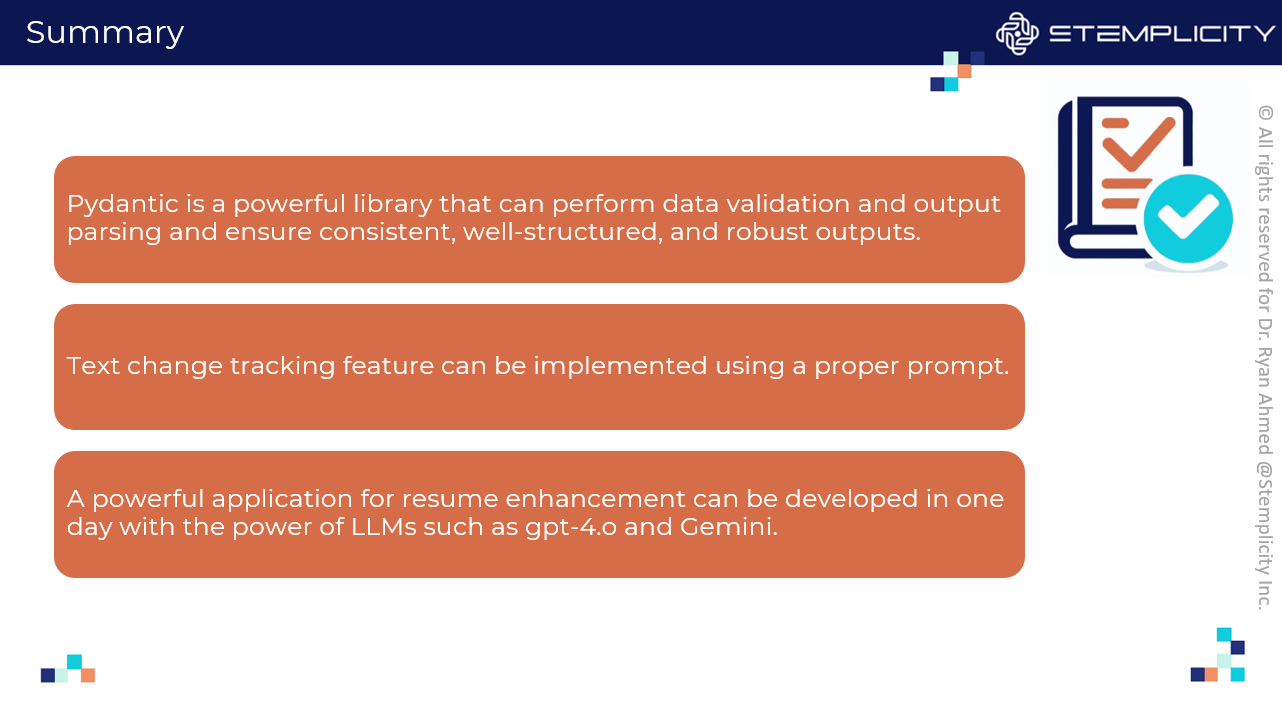

- **Would love to connect with everyone on LinkedIn: www.linkedin.com/in/dr-ryan-ahmed**

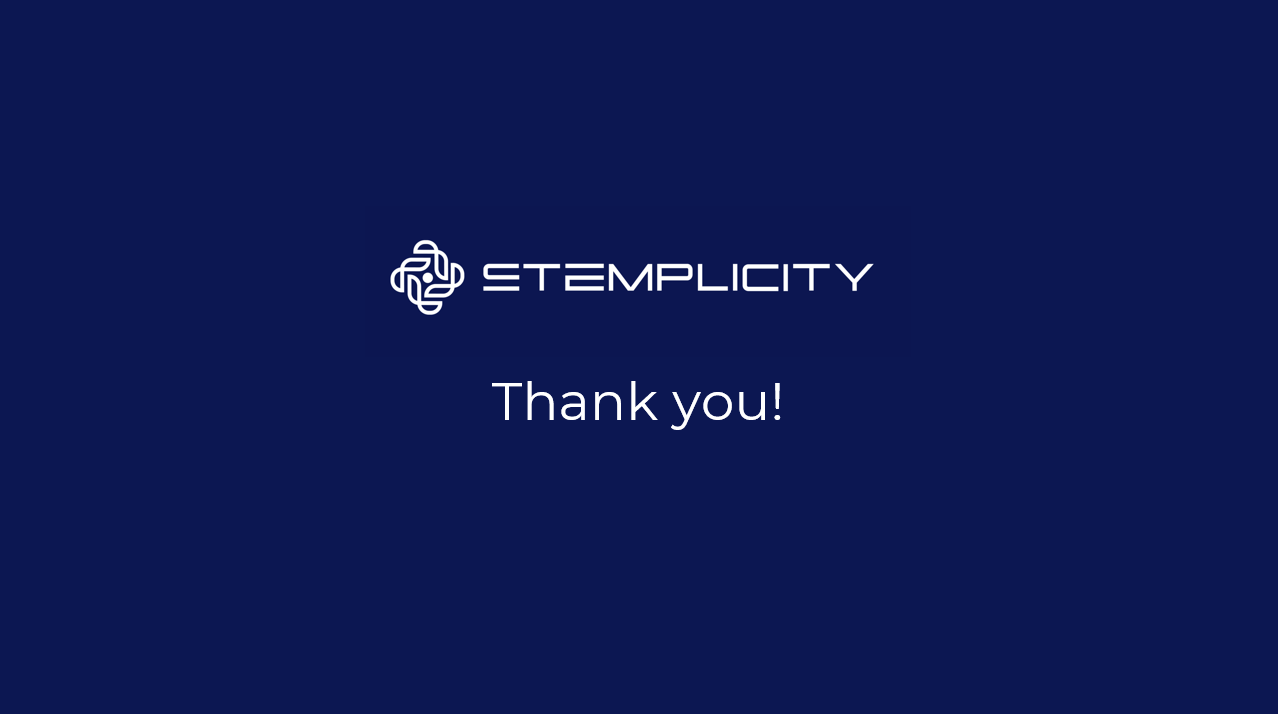